Для демонстрації, як машинне навчання може покращити якість аудиту через точне ідентифікування потенційних ризиків і відхилень у фінансових звітах, ми можемо використати алгоритм випадкового лісу. Цей метод є ефективним для класифікації та регресії і чудово підходить для роботи з комплексними наборами даних, маючи властивості зменшення перенавчання.

### Приклад використання випадкового лісу для покращення якості аудиту

Спочатку, давайте створимо фіктивний набір даних, який містить деякі характеристики фінансових транзакцій, а потім застосуємо випадковий ліс для виявлення ризикованих транзакцій.


              precision    recall  f1-score   support

           0       0.60      0.84      0.70     14966
           1       0.42      0.17      0.24     10034

    accuracy                           0.57     25000
   macro avg       0.51      0.51      0.47     25000
weighted avg       0.53      0.57      0.52     25000



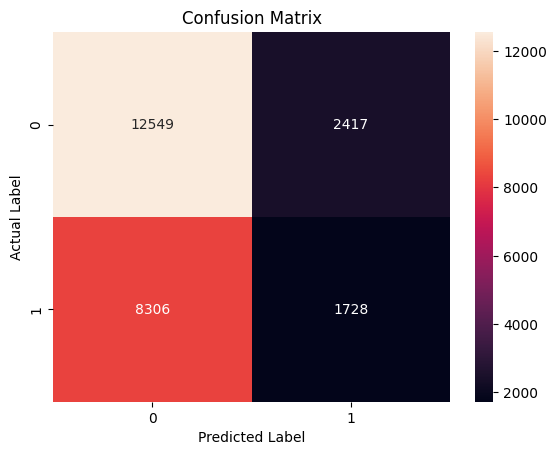

In [3]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Генерація симульованих даних
np.random.seed(42)
data_size = 100000
data = {
    'Average_Transaction_Amount': np.random.gamma(shape=2, scale=150, size=data_size),
    'Transaction_Count': np.random.poisson(lam=20, size=data_size),
    'Days_Since_Last_Transaction': np.random.randint(1, 30, size=data_size),
    'Credit_Score': np.random.randint(300, 850, size=data_size),
    'Risk_Score': np.random.uniform(0, 1, size=data_size),
    'Fraudulent': np.random.choice([0, 1], size=data_size, p=[0.6, 0.4])
}

# Створення DataFrame
df = pd.DataFrame(data)

# Розділення даних на тренувальні і тестові
X = df.drop('Fraudulent', axis=1)
y = df['Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Створення і навчання моделі випадкового лісу
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Візуалізація конфузійної матриці
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()





### Аналіз

- **Випадковий ліс** використовується для навчання моделі на історичних даних, щоб вона могла точно ідентифікувати ризиковані або шахрайські транзакції.
- Вихідні дані включають **класифікаційний звіт** та **конфузійну матрицю**, які допомагають оцінити ефективність моделі у виявленні фактичних та шахрайських транзакцій.
- Модель допомагає зменшити вплив людських помилок

Для створення більш реалістичного сценарію, де ризиковані транзакції генеруються за окремими умовами, ми можемо модифікувати параметри генерації даних. Наприклад, ми можемо встановити, що ризиковані транзакції мають вищу середню суму, більшу кількість транзакцій, і меншу кількість днів з моменту останньої транзакції. Ось приклад коду для такої модифікації:




              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23754
           1       0.97      0.93      0.95      1246

    accuracy                           1.00     25000
   macro avg       0.98      0.96      0.97     25000
weighted avg       1.00      1.00      1.00     25000



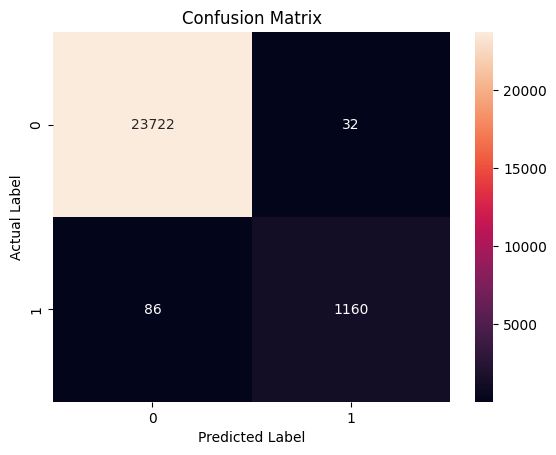

In [10]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Функція для генерації даних
def generate_data(n_samples=10000, fraud_ratio=0.05):
    np.random.seed(42)
    n_fraud = int(n_samples * fraud_ratio)
    n_normal = n_samples - n_fraud
    
    # Генерація даних для нормальних транзакцій
    normal_data = {
        'Average_Transaction_Amount': np.random.gamma(shape=2, scale=100, size=n_normal),
        'Transaction_Count': np.random.poisson(lam=5, size=n_normal),
        'Days_Since_Last_Transaction': np.random.randint(10, 30, size=n_normal),
        'Credit_Score': np.random.randint(500, 850, size=n_normal),
        'Risk_Score': np.random.uniform(0, 0.7, size=n_normal)
    }
    
    # Генерація даних для ризикованих транзакцій
    fraud_data = {
        'Average_Transaction_Amount': np.random.gamma(shape=3, scale=200, size=n_fraud),
        'Transaction_Count': np.random.poisson(lam=10, size=n_fraud),
        'Days_Since_Last_Transaction': np.random.randint(1, 20, size=n_fraud),
        'Credit_Score': np.random.randint(300, 700, size=n_fraud),
        'Risk_Score': np.random.uniform(0.3, 1, size=n_fraud)
    }
    
    # Створення DataFrame
    df_normal = pd.DataFrame(normal_data)
    df_fraud = pd.DataFrame(fraud_data)
    df_normal['Fraudulent'] = 0
    df_fraud['Fraudulent'] = 1
    
    return pd.concat([df_normal, df_fraud], ignore_index=True)

# Генерація даних
data = generate_data(100000, 0.05)

# Розділення даних на тренувальні і тестові
X = data.drop('Fraudulent', axis=1)
y = data['Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Створення і навчання моделі випадкового лісу
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Візуалізація конфузійної матриці
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



AttributeError: 'DataFrame' object has no attribute 'summary'


Цей код забезпечує наступне:
- **Функція `generate_data`** створює розділені набори даних для "нормальних" та "ризикованих" транзакцій.
- Ризиковані транзакції мають більшу середню сум

у транзакцій, вищу частоту транзакцій, і коротший час з останньої транзакції, що імітує більш високий рівень ризику.
- Дані використовуються для навчання моделі випадкового лісу, яка потім оцінюється за допомогою звіту про класифікацію та конфузійної матриці.